# Detect a car and place bounding boxes around it

In [12]:
!pip install ultralytics
from ultralytics import YOLO


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [13]:
model = YOLO("yolov8m.pt")

In [51]:
results = model.predict("images/carImage0.jpg")


image 1/1 /opt/app-root/src/car-accident-detection/images/carImage0.jpg: 480x640 1 car, 326.8ms
Speed: 1.3ms preprocess, 326.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


In [52]:
result = results[0]

In [53]:
#detect how many boxes found - 1 box per image recognized
len(result.boxes)

1

In [46]:
#analyze each box
box = result.boxes[0]
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([2.])
Coordinates: tensor([[ 14.6989,  80.9851, 170.3825, 154.6830]])
Probability: tensor([0.9126])


In [47]:
#unpack the actual values from the Tensor
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [14.698927879333496, 80.9851303100586, 170.3825225830078, 154.6829833984375]
Probability: 0.9126059412956238


In [48]:
#COCO object classes are well known. The YOLOv8 result object cotains the 'names' property to get these classes

print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw


In our example we find that '2' is 'car'.  The bounding box is the bounding box for detected 'car'


In [49]:
#round all coordinates using Python list comprehension. 
#getname of the detected object class by ID using the result.names dictionary

cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: car
Coordinates: [15, 81, 170, 155]
Probability: 0.91


In [54]:
#write code to get this info (for all of our detected boxes) in a loop

for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: car
Coordinates: [15, 81, 170, 155]
Probability: 0.91
---


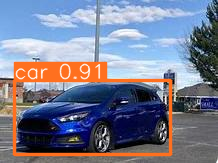

In [55]:
#In the photo place boxes listing name, probability around each car (object type)
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])